### timezone

In [1]:
from datetime import datetime

In [2]:
from datetime import timezone

In [3]:
timezone.utc

datetime.timezone.utc

In [4]:
datetime(2019, 1, 1) # time zone unawared datetime

datetime.datetime(2019, 1, 1, 0, 0)

In [5]:
datetime(2019, 1,1, tzinfo=timezone.utc) # timezon awared datetime

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

In [ ]:
# 특정 시간대와의 차이를 알려면 utc만 정의가 되어있고 다른 데이트타임이 없어서 한계가 있음 그래서 엑스트라 패키지를 많이 씀
#스탠다드 패키지가 아니라서 설치해야함

In [ ]:
# conda install pytz
# pip install pytz

In [6]:
import pytz

In [7]:
pytz.utc

<UTC>

In [8]:
pytz.all_timezones # pytz가 알아들을 수 있는 타임존이 나옴

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [9]:
pytz.timezone('Asia/Seoul') #한국 시간 나옴

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [17]:
datetime(2019, 1,1, tzinfo=timezone.utc) == pytz.UTC.localize(datetime(2019,1,1))

True

In [18]:
KST = pytz.timezone('Asia/Seoul')

In [19]:
datetime(2019,1,1,tzinfo=timezone.utc) == \
KST.localize(datetime(2019,1,1)) # false인 이유는 9시간이 차이나니까.. ! pytz를 쓰는게 편함

False

In [20]:
mydate = datetime(2019,1,1)

In [21]:
mydate.replace(year=2018)

datetime.datetime(2018, 1, 1, 0, 0)

In [25]:
mydate.replace(tzinfo=KST) #된거처럼 보이지만 시간이 8시로 나옴. 잘못나옴..!! 그래서 kst를 로컬라이즈하고 데이트타임을 넣어줘야 정확하게 계산 됨

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

In [26]:
mydate_kst = KST.localize(mydate)
mydate_kst

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [28]:
mydate_kst.astimezone(pytz.utc) == mydate_kst # 외국에서 그 나라의 시간에 맞게 출력됨

True

In [ ]:
# strftime.org 에 들어가면 %d 같은거 설명 나옴
# 범용이라서 모든 언어에서 다 똑같이 씀 

In [29]:
mydate_kst.strftime('%Y-%m-%d %H:%M:%S%Z') # str format time

'2019-01-01 00:00:00KST'

In [30]:
mydate_kst.astimezone(pytz.utc).strftime('%Y-%m-%d %H:%M:%S%Z')

'2018-12-31 15:00:00UTC'

In [32]:
datetime.today() #system의 시간을 읽어옴. 혹시 환경설정에서 us로 해놓으면 미국 시간으로 나옴. 
# 다른 나라에서 실행하면 결과가 다르게 나오니까 조심해서 써야함


datetime.datetime(2019, 1, 24, 15, 50, 58, 67951)

In [34]:
datetime.utcnow().astimezone(KST) # 이렇게 하면 전세계 어디에서든 똑같은 시간으로 나옴

datetime.datetime(2019, 1, 24, 6, 52, 21, 905205, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [35]:
today=datetime.today()

In [36]:
today.weekday() # 월요일이 0 

3

In [37]:
datetime(2019, 1, 23).weekday()

2

In [79]:
# 바로 전 주 금요일 출력하는 함수 

today=KST.localize(datetime.today())
def last_friday():
    for i in range(7):
        if (today.weekday()-i)%7 ==4:
            print(today.day-i)            

In [80]:
last_friday()

18


In [81]:
def last_friday():
    today=KST.localize(datetime.today())
    offset = 4- today.weekday() %4 # 30일에 이 함수를 쓰면 값이 넘어감. 따라서 타임델타를 활용
    aweekago=today.replace(day=today.day-7) # 5일에 이 함수를 쓰면 -2일이 됨
    last_friday = aweekago.replace(day=aweekago.day+offset)
    return last_friday

In [82]:
last_friday()

datetime.datetime(2019, 1, 18, 16, 7, 52, 295411, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [83]:
from datetime import timedelta

In [84]:
mydate

datetime.datetime(2019, 1, 1, 0, 0)

In [87]:
pytz.utc.localize(mydate) - KST.localize(mydate) # 초로 나옴

datetime.timedelta(seconds=32400)

In [88]:
pytz.utc.localize(mydate) + timedelta(seconds=32400)

datetime.datetime(2019, 1, 1, 9, 0, tzinfo=<UTC>)

In [89]:
def last_friday():
    today=KST.localize(datetime.today())
    offset = 4- today.weekday() %4 
    aweekago = today - timedelta(weeks=1)
#     aweekago=today.replace(day=today.day-7)
    last_friday = aweekago + timedelta(days=offset)
#     last_friday = aweekago.replace(day=aweekago.day+offset)
    return last_friday

In [90]:
last_friday()

datetime.datetime(2019, 1, 18, 16, 12, 28, 812412, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
df_apple = \
pd.read_csv('apple_stock.csv', index_col='Date', parse_dates=True)

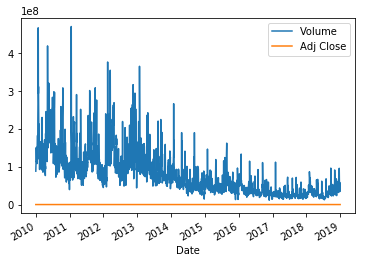

In [98]:
df_apple[['Volume', 'Adj Close']].plot() #volume은 유동성을 보이는데 adjust가 상수처럼 보이는 문제가 있음
#volume은 e8 이라서 엄청 큼, adj는 200정도로 작음

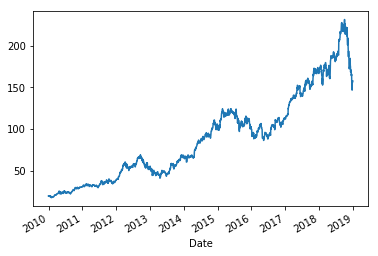

In [99]:
df_apple['Adj Close'].plot()

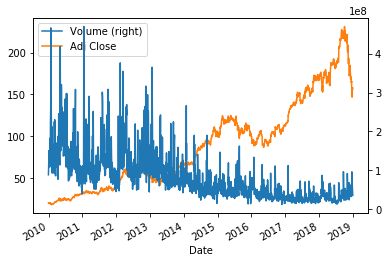

In [100]:
df_apple[['Volume','Adj Close']].plot(secondary_y=['Volume']) #양쪽 축에 값이 나올 수 있음

Text(0.5,1,'Apple')

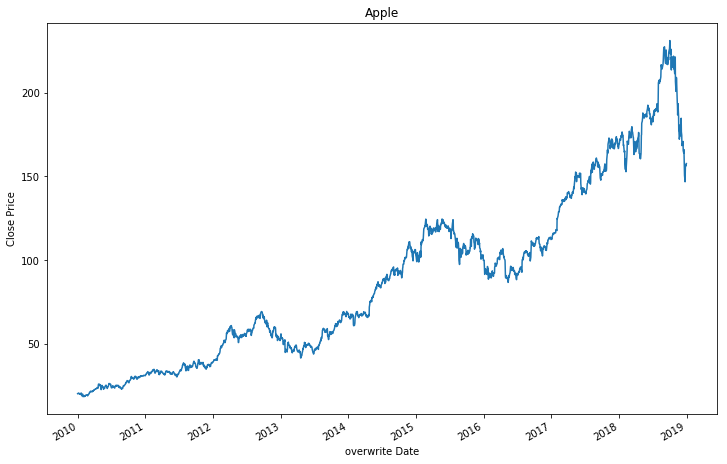

In [105]:
df_apple['Adj Close'].plot(figsize=(12,8))
plt.ylabel('Close Price') # 주피터라서 가능함. 한 셀에서 표시하면 한꺼번에 표시 가능
plt.xlabel('overwrite Date')
plt.title('Apple')

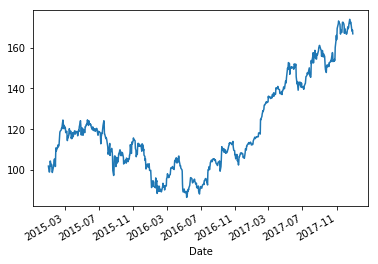

In [108]:
df_apple['Adj Close']['2015-01-01':'2018-01-01'].plot()

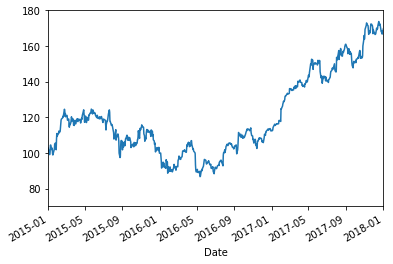

In [112]:
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'],
                          ylim=[70,180])

In [113]:
index = df_apple['2015-01-01':'2018-01-01'].index
stock = df_apple['2015-01-01':'2018-01-01']['Adj Close']

In [117]:
import matplotlib.dates as dates

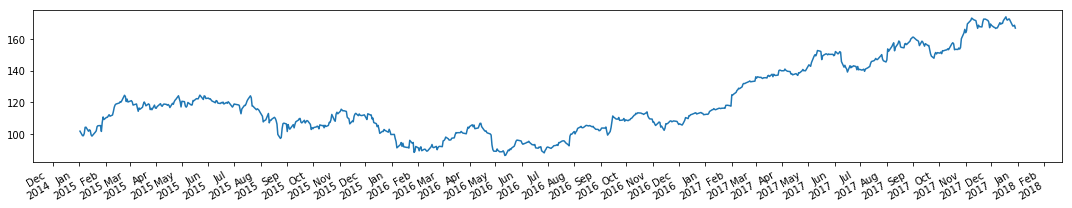

In [121]:
fig, ax=plt.subplots(figsize=(15,3))
ax.plot_date(index, stock,'-') # -는 라인
# major locator와 formatter를 활용하면 x축 값들을 다양하게 사용가능
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) # b로 Dec Jan.. 이고 \n 은 개행
fig.autofmt_xdate() # x축에서 겹치는걸 알아서 겹친걸 풀어서 써줌
plt.tight_layout()